In [1]:
# Re-run this cell 
import pandas as pd

# Read in the data
schools = pd.read_csv("..\datas\schools.csv")

# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [2]:
math_threshold = 0.8 * 800
best_math_schools = schools[schools['average_math'] >= math_threshold][['school_name', 'average_math']]
best_math_schools = best_math_schools.sort_values(by='average_math', ascending=False)

In [3]:
schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']
top_10_schools = schools[['school_name', 'total_SAT']].sort_values(by='total_SAT', ascending=False).head(10)

In [4]:
borough_stats = schools.groupby('borough')['total_SAT'].agg(['count', 'mean', 'std'])
borough_stats.columns = ['num_schools', 'average_SAT', 'std_SAT']
largest_std_dev = borough_stats.loc[borough_stats['std_SAT'].idxmax()].to_frame().T
largest_std_dev.reset_index(inplace=True)
largest_std_dev.rename(columns={'index': 'borough'}, inplace=True)

In [5]:
largest_std_dev = largest_std_dev.round(2)


In [6]:
file_path = '..\datas\schools.csv'  # Update this path to the correct one
schools_df = pd.read_csv(file_path)
missing_values = schools_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 school_name         0
borough             0
building_code       0
average_math        0
average_reading     0
average_writing     0
percent_tested     20
dtype: int64


In [7]:
# Handle missing values by filling with the mean
schools_df['percent_tested'].fillna(schools_df['percent_tested'].mean(), inplace=True)


In [8]:
# Check for duplicate entries
duplicate_entries = schools_df.duplicated().sum()
print("Duplicate Entries:", duplicate_entries)

# Summary Statistics
summary_statistics = schools_df.describe()
print("Summary Statistics:\n", summary_statistics)

Duplicate Entries: 0
Summary Statistics:
        average_math  average_reading  average_writing  percent_tested
count    375.000000       375.000000       375.000000      375.000000
mean     432.944000       424.504000       418.458667       64.976338
std       71.952373        61.881069        64.548599       18.239474
min      317.000000       302.000000       284.000000       18.500000
25%      386.000000       386.000000       382.000000       52.150000
50%      415.000000       413.000000       403.000000       64.976338
75%      458.500000       445.000000       437.500000       78.850000
max      754.000000       697.000000       693.000000      100.000000


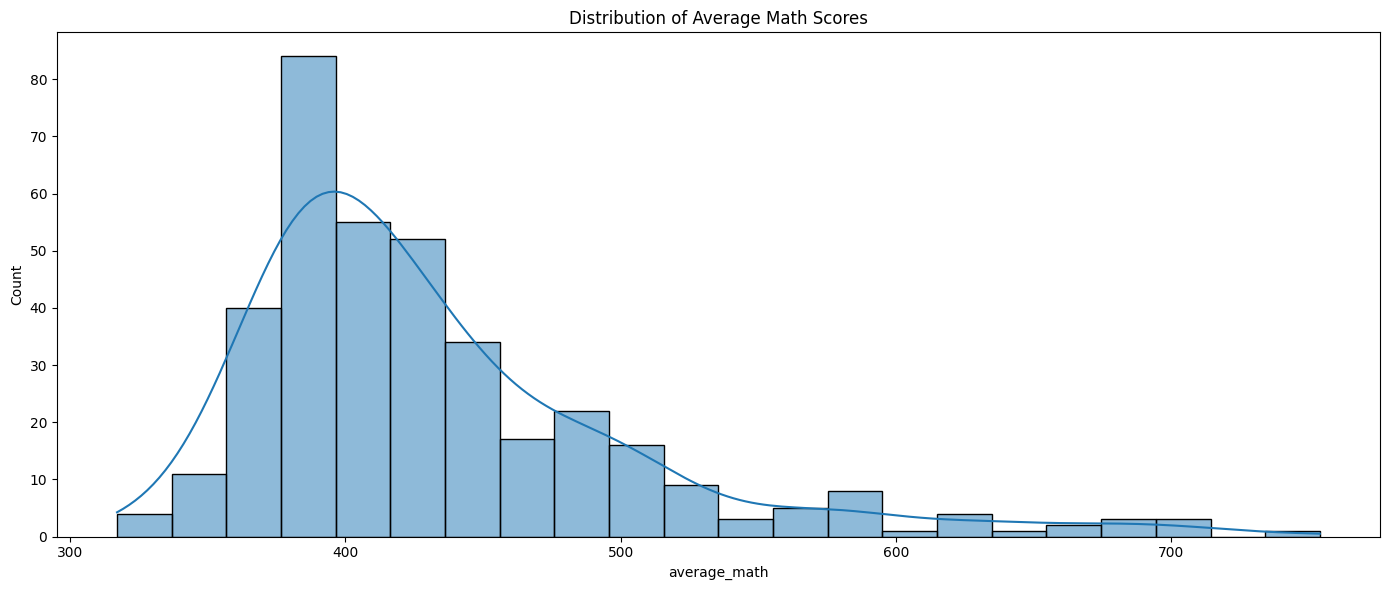

In [9]:
# Histograms for test scores
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))

sns.histplot(schools_df['average_math'], kde=True)
plt.title('Distribution of Average Math Scores')



plt.tight_layout()
plt.show()

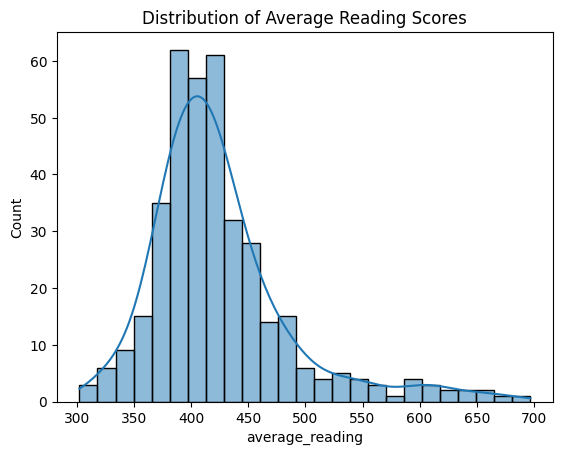

In [10]:
sns.histplot(schools_df['average_reading'], kde=True)
plt.title('Distribution of Average Reading Scores')
plt.show()

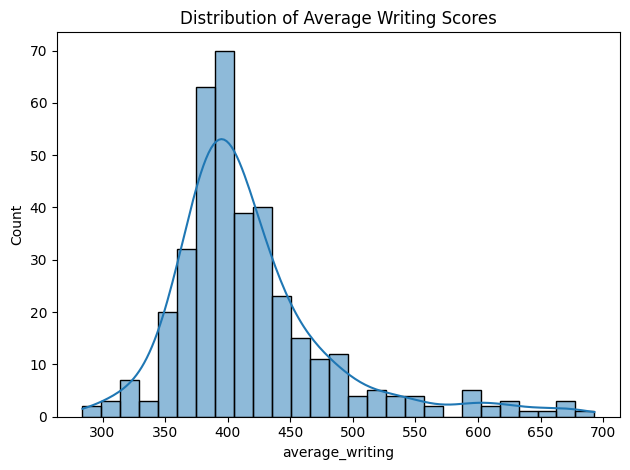

In [11]:
sns.histplot(schools_df['average_writing'], kde=True)
plt.title('Distribution of Average Writing Scores')
plt.tight_layout()

plt.show()

Correlation Matrix:
                  average_math  average_reading  average_writing
average_math         1.000000         0.928239         0.934155
average_reading      0.928239         1.000000         0.985439
average_writing      0.934155         0.985439         1.000000


C:\Users\Asus\AppData\Local\Temp\ipykernel_4640\2845169493.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores_by_borough = schools_df.groupby('borough').mean()[['average_math', 'average_reading', 'average_writing']]


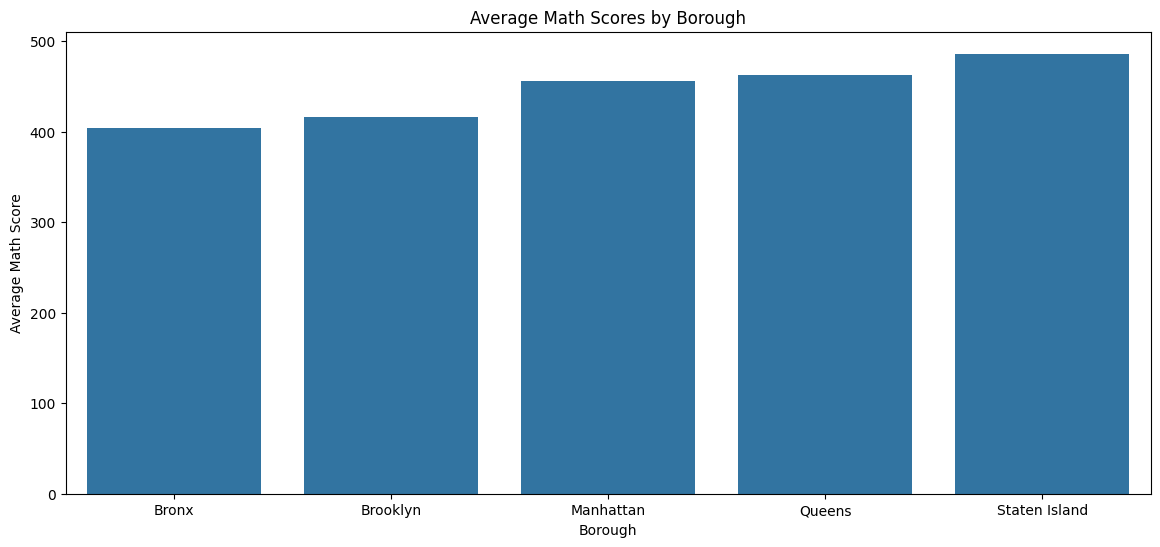

In [12]:
# Correlation Matrix
correlation_matrix = schools_df[['average_math', 'average_reading', 'average_writing']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Bar plots for average scores by borough
average_scores_by_borough = schools_df.groupby('borough').mean()[['average_math', 'average_reading', 'average_writing']]

# Plotting bar plots
plt.figure(figsize=(14, 6))

sns.barplot(x=average_scores_by_borough.index, y=average_scores_by_borough['average_math'])
plt.title('Average Math Scores by Borough')
plt.ylabel('Average Math Score')
plt.xlabel('Borough')
plt.show()

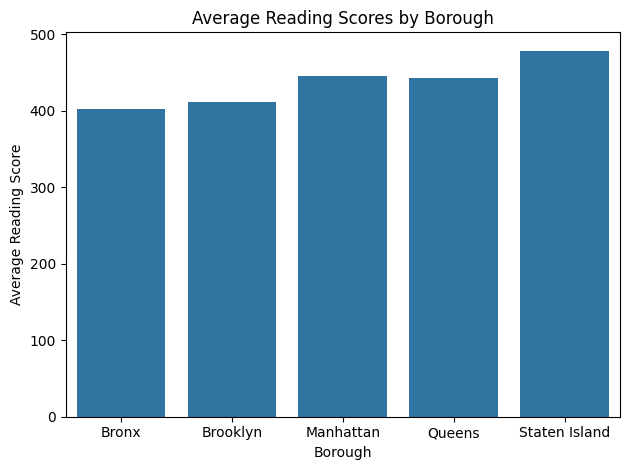

In [13]:
sns.barplot(x=average_scores_by_borough.index, y=average_scores_by_borough['average_reading'])
plt.title('Average Reading Scores by Borough')
plt.ylabel('Average Reading Score')
plt.xlabel('Borough')
plt.tight_layout()
plt.show()


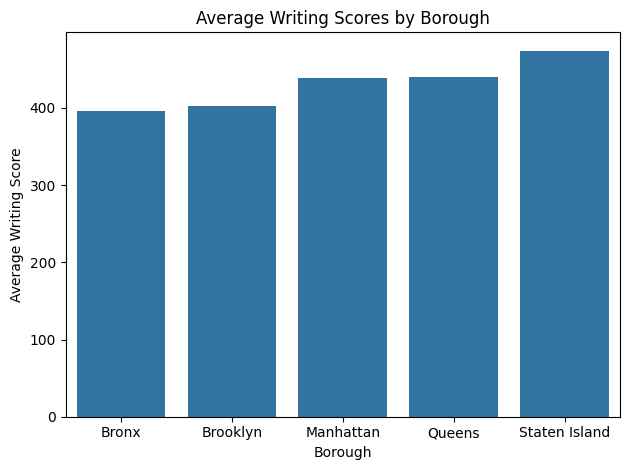

In [14]:
sns.barplot(x=average_scores_by_borough.index, y=average_scores_by_borough['average_writing'])
plt.title('Average Writing Scores by Borough')
plt.ylabel('Average Writing Score')
plt.xlabel('Borough')

plt.tight_layout()
plt.show()